In [205]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [206]:
#Download stopword list for further usage of text pre-processing
nltk.download('stopwords')

#Initialize PorterStemmer object for further stemming of words for text pre-processing
stemmer = PorterStemmer()

#Initializing CountVectorizer object for vectorize documents for text pre-processing, 2500 unique most frequent words are taken as features
vectorizer = CountVectorizer(max_features=2500)

# Initialize SMOTE for over-sampling of training data for imbalanced dataset
smote = SMOTE(random_state=42)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\supra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [207]:
#Load dataset using pandas
spam_ham_df = pd.read_csv('Spam-Ham-Dataset/spam.csv', encoding='latin1')

In [208]:
#Sample of 10 datapoints for better understanding of datapoints
spam_ham_df.head(n=10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [209]:
#Unnamed:2 , Unnamed:3 and Unnamed:4 are unnecessery columns so removing them from dataframe
spam_ham_df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [210]:
#Print shape of dataset
spam_ham_df.shape

(5572, 2)

In [211]:
#Sample of 10 datapoints to check if unnecessery columns are removed or not
spam_ham_df.head(n=10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [212]:
#Renaming required columns
spam_ham_df.rename(
    columns= {
        'v2': 'sms',
        'v1': 'result'
    },
    inplace=True
)

In [213]:
#Sample of 10 datapoints to check if renaming of columns happened
spam_ham_df.head(n=10)

,result,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [214]:
# info for the dataset to check if null values are present in any of the rows
spam_ham_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   result  5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [215]:
#There is no null value for any row so no need to remove null values
#Check for duplicate rows
spam_ham_df.duplicated().sum()

403

In [216]:
#Remove duplicate datapoints
spam_ham_df.drop_duplicates(keep='first', inplace=True)

In [217]:
#Print shape of dataset after removing duplicates
spam_ham_df.shape

(5169, 2)

In [218]:
#Converting result column in numerical binary data
for i in range(spam_ham_df.shape[0]):
    if 'ham' in spam_ham_df['result'].iloc[i]:
        spam_ham_df['result'].iloc[i] = 0
    else:
        spam_ham_df['result'].iloc[i] = 1

C:\Users\supra\AppData\Local\Temp\ipykernel_34128\427277610.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  spam_ham_df['result'].iloc[i] = 0
C:\Users\supra\AppData\Local\Temp\ipykernel_34128\427277610.py:6: FutureWarning: ChainedAssignm

In [219]:
#Check if imbalanced dataset or not using frequency of individual binary classes
class_freq = spam_ham_df['result'].value_counts()
class_freq

result
0    4516
1     653
Name: count, dtype: int64

In [220]:
#Dataset is imbalanced as output binary classes don't have same or nearly same frequency
print(spam_ham_df['result'].value_counts().index)
print(spam_ham_df['result'].value_counts().values)

Index([0, 1], dtype='object', name='result')
[4516  653]


<BarContainer object of 2 artists>

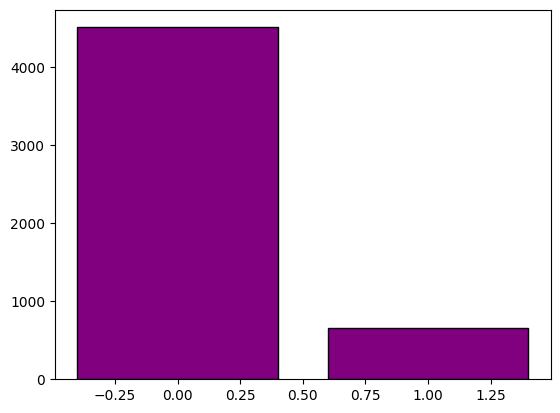

In [221]:
#Plotting frequency of output binary classes
plt.bar(class_freq.index, class_freq.values, color='purple', edgecolor='black')

In [222]:
#getting sample dataset to check if result column converted into numerical binary classes
spam_ham_df.head(n=10)

,result,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [223]:
#remove special characters and converting datapoints into lower case from dataframe
_index = 0
for row_sms in spam_ham_df['sms']:
    text = ''
    for sms_char in row_sms:
        if sms_char.isalnum() or sms_char.isspace():
            text += sms_char
    spam_ham_df['sms'].iloc[_index] = text.lower()
    _index = _index + 1
    text = ''

C:\Users\supra\AppData\Local\Temp\ipykernel_34128\1515830498.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  spam_ham_df['sms'].iloc[_index] = text.lower()


In [224]:
#removing stopwords from sms and stemming for better accuracy
_index = 0
for i in range(spam_ham_df.shape[0]):
    split_words = []
    for _word in spam_ham_df['sms'].iloc[i].split():
        if _word not in stopwords.words('english'):
            split_words.append(stemmer.stem(_word))
    spam_ham_df['sms'].iloc[_index] = split_words[:]
    _index = _index + 1
    split_words.clear()

C:\Users\supra\AppData\Local\Temp\ipykernel_34128\4258677840.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  spam_ham_df['sms'].iloc[_index] = split_words[:]


In [225]:
#joining sms messages together after text preprocessing
for i in range(spam_ham_df.shape[0]):
    spam_ham_df['sms'].iloc[i] = ' '.join(spam_ham_df['sms'].iloc[i])

C:\Users\supra\AppData\Local\Temp\ipykernel_34128\3469519638.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  spam_ham_df['sms'].iloc[i] = ' '.join(spam_ham_df['sms'].iloc[i])


In [226]:
#Vectorizing dataframe sms column
vectorized_output = vectorizer.fit_transform(spam_ham_df['sms'])
vectorized_output_as_array = vectorized_output.toarray()
print('Indecies of unique words in dataframe: ', vectorizer.vocabulary_)
print('Number of unique words taken as features', len(vectorizer.get_feature_names_out()))

Indecies of unique words in dataframe:  {'go': 969, 'point': 1759, 'crazi': 622, 'avail': 309, 'bugi': 463, 'great': 1000, 'world': 2423, 'la': 1261, 'cine': 547, 'got': 987, 'wat': 2358, 'ok': 1626, 'lar': 1268, 'joke': 1225, 'wif': 2397, 'oni': 1636, 'free': 895, 'entri': 778, 'wkli': 2413, 'comp': 578, 'win': 2401, 'cup': 633, 'final': 854, 'may': 1408, 'text': 2180, '87121': 118, 'receiv': 1848, 'txt': 2272, 'appli': 269, 'dun': 742, 'say': 1934, 'earli': 746, 'hor': 1106, 'alreadi': 225, 'nah': 1533, 'dont': 721, 'think': 2195, 'goe': 972, 'usf': 2307, 'live': 1320, 'around': 284, 'though': 2200, 'freemsg': 897, 'hey': 1075, 'darl': 651, 'week': 2370, 'word': 2420, 'back': 322, 'id': 1147, 'like': 1307, 'fun': 918, 'still': 2098, 'tb': 2162, 'xxx': 2447, 'std': 2096, 'send': 1959, 'å150': 2482, 'even': 791, 'brother': 451, 'speak': 2072, 'treat': 2250, 'aid': 201, 'per': 1708, 'request': 1876, 'mell': 1427, 'oru': 1656, 'set': 1968, 'callertun': 482, 'caller': 481, 'press': 1785, 

In [227]:
#Creating dataframe for vectorized dataset
X = vectorized_output_as_array
Y = spam_ham_df['result'].astype(int)

columns_ = vectorizer.get_feature_names_out()
vectorized_df = pd.DataFrame(data=X, columns=columns_)
vectorized_df['result_'] = pd.Series(Y)
vectorized_df.head(n=10)

,020603,07xxxxxxxxx,0800,08000839402,08000930705,08001950382,08002986906,0845,0870,08701417012,...,å400,å450,å500,å5000,å800,å900,åð,ìï,ûò,result_
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [228]:
#Splitting data for training and testing
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, random_state=42, test_size=0.3, stratify=Y)
print('X train data shape:', X_Train.shape)
print('X test data shape:', X_Test.shape)
print('Y train data shape:', Y_Train.shape)
print('Y test data shape:', Y_Test.shape)

X train data shape: (3618, 2500)
X test data shape: (1551, 2500)
Y train data shape: (3618,)
Y test data shape: (1551,)


In [229]:
pd.Series(Y_Train).value_counts()

result
0    3161
1     457
Name: count, dtype: int64

In [230]:
#As dataset is imballanced so resampling(generating new datapoints) using SMOTE resampling technique
X_Resampled, Y_Resampled = smote.fit_resample(X_Train, Y_Train)
print('Resampled training dataset shape: ', X_Resampled.shape)
print('Resampled binary class output shape: ', Y_Resampled.shape)

Resampled training dataset shape:  (6322, 2500)
Resampled binary class output shape:  (6322,)


In [231]:
#Clecking if training data is balanced after resampling for better model training
pd.Series(Y_Resampled).value_counts()

result
0    3161
1    3161
Name: count, dtype: int64

In [232]:
# Initializing bernoulliNB, gaussianNB and multinomialNB objects
bernoulliNB = BernoulliNB()
gaussianNB = GaussianNB()
multinomialNB = MultinomialNB()

In [233]:
# Training resampled dataset using bernoulliNB, gaussianNB and multinomialNB objects
bernoulliNB.fit(X_Resampled, Y_Resampled)
gaussianNB.fit(X_Resampled, Y_Resampled)
multinomialNB.fit(X_Resampled, Y_Resampled)

MultinomialNB()

In [234]:
# Generating predicted output from testing dataset
bernoulliNB_Y_Pred = bernoulliNB.predict(X_Test)
gaussianNB_Y_Pred = gaussianNB.predict(X_Test)
multinomialNB_Y_Pred = multinomialNB.predict(X_Test)

In [235]:
#bernoulliNB preformance metric
bernoulliNB_Accuracy = accuracy_score(Y_Test, bernoulliNB_Y_Pred)
bernoulliNB_Precision = precision_score(Y_Test, bernoulliNB_Y_Pred)
bernoulliNB_recall_score = recall_score(Y_Test, bernoulliNB_Y_Pred)
bernoulliNB_f1_score = f1_score(Y_Test, bernoulliNB_Y_Pred)
print('bernoulliNB accuracy metric:', bernoulliNB_Accuracy)
print('bernoulliNB precision metric:', bernoulliNB_Precision)
print('bernoulliNB recall metric:', bernoulliNB_recall_score)
print('bernoulliNB f1-score metric:', bernoulliNB_f1_score)

bernoulliNB accuracy metric: 0.9516441005802708
bernoulliNB precision metric: 0.7737556561085973
bernoulliNB recall metric: 0.8724489795918368
bernoulliNB f1-score metric: 0.8201438848920863


In [236]:
#gaussianNB preformance metric
gaussianNB_Accuracy = accuracy_score(Y_Test, gaussianNB_Y_Pred)
gaussianNB_Precision = precision_score(Y_Test, gaussianNB_Y_Pred)
gaussianNB_recall_score = recall_score(Y_Test, gaussianNB_Y_Pred)
gaussianNB_f1_score = f1_score(Y_Test, gaussianNB_Y_Pred)
print('GaussianNB accuracy metric:', gaussianNB_Accuracy)
print('GaussianNB precision metric:', gaussianNB_Precision)
print('GaussianNB recall metric:', gaussianNB_recall_score)
print('GaussianNB f1-score metric:', gaussianNB_f1_score)

GaussianNB accuracy metric: 0.8704061895551257
GaussianNB precision metric: 0.49279538904899134
GaussianNB recall metric: 0.8724489795918368
GaussianNB f1-score metric: 0.6298342541436464


In [237]:
#multinomialNB preformance metric
multinomialNB_Accuracy = accuracy_score(Y_Test, multinomialNB_Y_Pred)
multinomialNB_Precision = precision_score(Y_Test, multinomialNB_Y_Pred)
multinomialNB_recall_score = recall_score(Y_Test, multinomialNB_Y_Pred)
multinomialNB_f1_score = f1_score(Y_Test, multinomialNB_Y_Pred)
print('multinomialNB accuracy metric:', multinomialNB_Accuracy)
print('multinomialNB precision metric:', multinomialNB_Precision)
print('multinomialNB recall metric:', multinomialNB_recall_score)
print('multinomialNB f1-score metric:', multinomialNB_f1_score)

multinomialNB accuracy metric: 0.9690522243713733
multinomialNB precision metric: 0.8737373737373737
multinomialNB recall metric: 0.8826530612244898
multinomialNB f1-score metric: 0.8781725888324873


Text(0.5, 1.0, 'bernoulliNB Confusion Matrix')

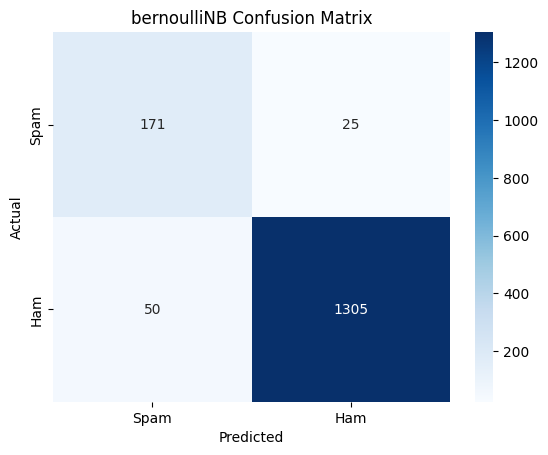

In [238]:
#bernoulliNB confussion matrix
bernoulliNB_confussion_matrix = confusion_matrix(Y_Test, bernoulliNB_Y_Pred, labels=[1,0])
bernoulliNB_Heatmap = sns.heatmap(bernoulliNB_confussion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Spam", "Ham"], yticklabels=["Spam", "Ham"])
bernoulliNB_Heatmap.set_xlabel('Predicted')
bernoulliNB_Heatmap.set_ylabel('Actual')
bernoulliNB_Heatmap.set_title('bernoulliNB Confusion Matrix')

Text(0.5, 1.0, 'gaussianNB Confusion Matrix')

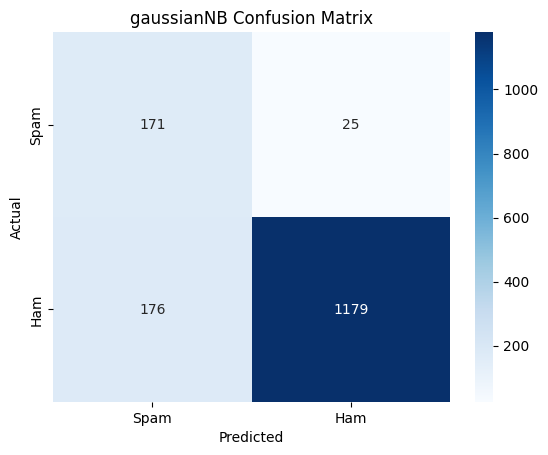

In [239]:
#gaussianNB confussion matrix
gaussianNB_confussion_matrix = confusion_matrix(Y_Test, gaussianNB_Y_Pred, labels=[1,0])
gaussianNB_Heatmap = sns.heatmap(gaussianNB_confussion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Spam", "Ham"], yticklabels=["Spam", "Ham"])
gaussianNB_Heatmap.set_xlabel('Predicted')
gaussianNB_Heatmap.set_ylabel('Actual')
gaussianNB_Heatmap.set_title('gaussianNB Confusion Matrix')

Text(0.5, 1.0, 'multinomialNB Confusion Matrix')

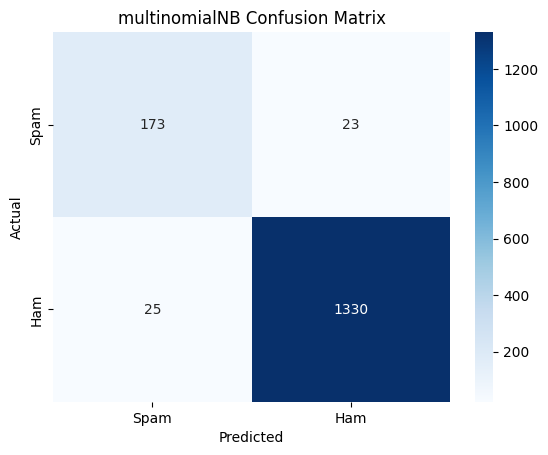

In [240]:
#multinomialNB confussion matrix
multinomialNB_confussion_matrix = confusion_matrix(Y_Test, multinomialNB_Y_Pred, labels=[1,0])
multinomialNB_Heatmap = sns.heatmap(multinomialNB_confussion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Spam", "Ham"], yticklabels=["Spam", "Ham"])
multinomialNB_Heatmap.set_xlabel('Predicted')
multinomialNB_Heatmap.set_ylabel('Actual')
multinomialNB_Heatmap.set_title('multinomialNB Confusion Matrix')

In [ ]:
# For Spam Ham classification precision score is more important than recall score so multinomialNB performs best in the classification prediction